### Task- Predictive modeling of customer bookings

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data-Prep
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Buidling and metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

Task 1.Loading the dataset

In [2]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### 2.Data-preprocessing
2.1.Checking for null values

In [4]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
data.describe() #no null values in our data set

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### 2.2.Feature Encoding

In [6]:
# Separating categorical and numerical columns
data_categorical = data.select_dtypes(include="object")
data_numerical = data.select_dtypes(exclude="object")

In [7]:
data_categorical.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [8]:
for col in data_categorical:
    print(data_categorical[col].value_counts())
    print("\n")

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64


RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64


Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64


AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64




In [9]:
data_categorical.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [10]:
columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for value in columns:
    data_categorical=pd.get_dummies(data_categorical, columns=[value],drop_first=True)

In [11]:
data_categorical.shape

(50000, 910)

In [12]:
data_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3.Outlier detection

In [13]:
data_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


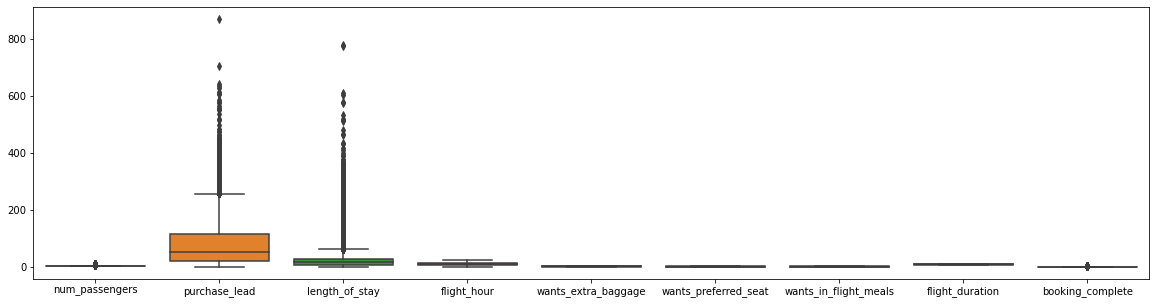

In [14]:
# Plotting boxplot for detecting outliers
plt.figure(figsize=(20,5))
sns.boxplot(data = data_numerical)
plt.show()

In [15]:
data_numerical.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [16]:
#Replacing outliers with median
#function to return a list of index of outliers
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']
for feature in column_list:
    Q1= data_numerical[feature].quantile(0.25)
    Q3 =data_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR
  
    
    median = data_numerical[feature].median()
    
    data_numerical[feature] = np.where(data_numerical[feature]< lower_limit, median,data_numerical[feature])
    data_numerical[feature] = np.where(data_numerical[feature]> upper_limit, median,data_numerical[feature])

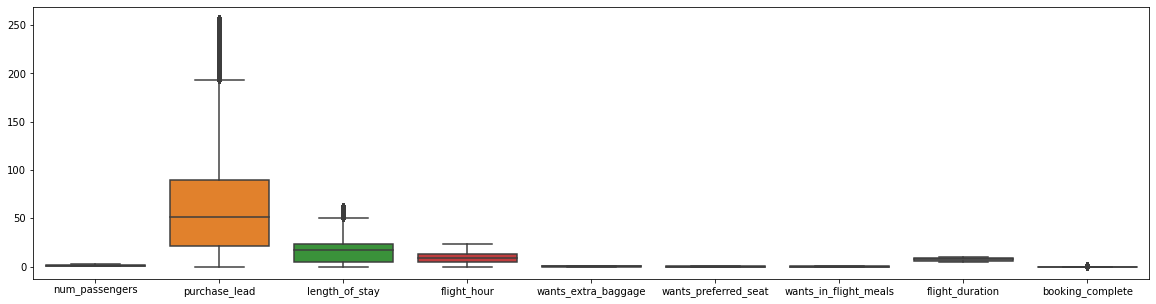

In [17]:
# Plotting boxplot for detecting outliers
plt.figure(figsize=(20,5))
sns.boxplot(data = data_numerical)
plt.show()

### 2.4.Feature Scaling

In [18]:
# combining numerical and categorical column data
df = pd.concat([data_categorical,data_numerical], axis =1)

In [19]:
df.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,1,0,0,0,0,0,...,0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,0,0,1,0,0,0,0,0,1,0,...,0,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,0,0,1,0,0,0,0,0,1,0,...,0,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [20]:
# Separating dependent and independent variables
X = df.drop(["booking_complete"] , axis=1)
y = df["booking_complete"]

# Using StandardScaler 
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled)

In [21]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.645168,-0.731702,-0.012257,0.703747,-0.649919,1.158082,-1.107368
49996,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,2.574671,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.751282,-0.731702,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.695041,-0.731702,2.389544,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.355785,-0.08832,0.100808,2.274053,-0.362669,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.844661,-0.731702,0.357251,0.703747,-0.649919,1.158082,-1.107368


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

### 2.5.Checking Data is imbalanced or not

In [23]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Our dataset is imbalanced.
Class Imbalance is a quite common problem and if not handled can have a impact on the model performance.
To create a balanced datase we will use SMOTE

In [24]:
print(X.shape)
print(y.shape)

(50000, 918)
(50000,)


In [25]:
# using imblearn to removing imablance in our dataset
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 918)
(85044,)


In [26]:
x_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175


In [27]:
y_smote.head() #This is all about preprocessing steps for the dataset


0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

### 3.EDA

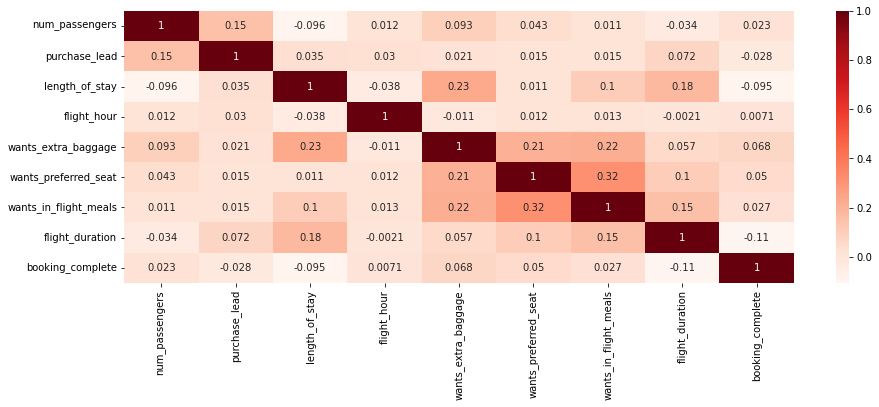

In [28]:
# Plotting heatmap 
plt.figure(figsize=(15,5))
sns.heatmap(data_numerical.corr() , annot=True, cmap="Reds")
plt.show()

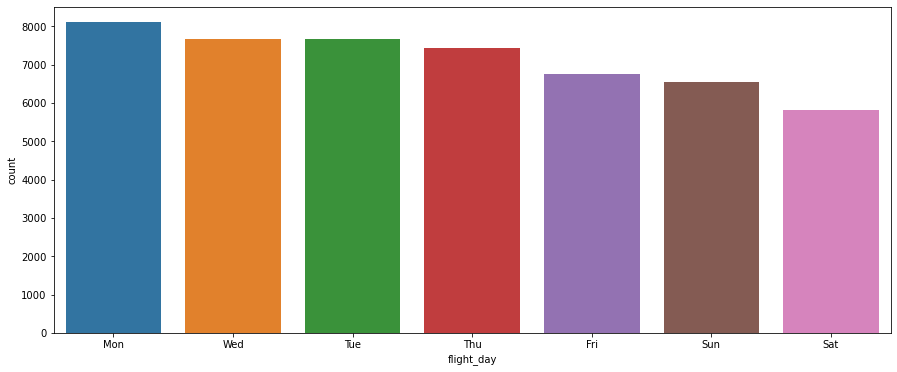

In [29]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=data, order=data["flight_day"].value_counts().index)
plt.show()

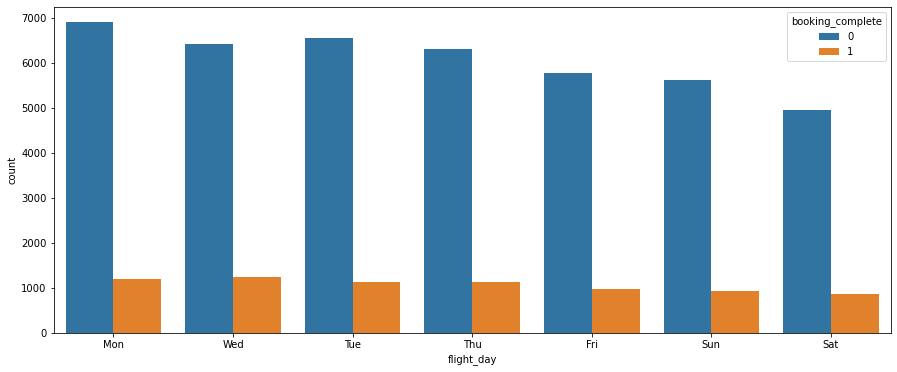

In [30]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day",hue = "booking_complete", data=data, order=data["flight_day"].value_counts().index)
plt.show()

No of flights is max on monday and lowest on Saturday

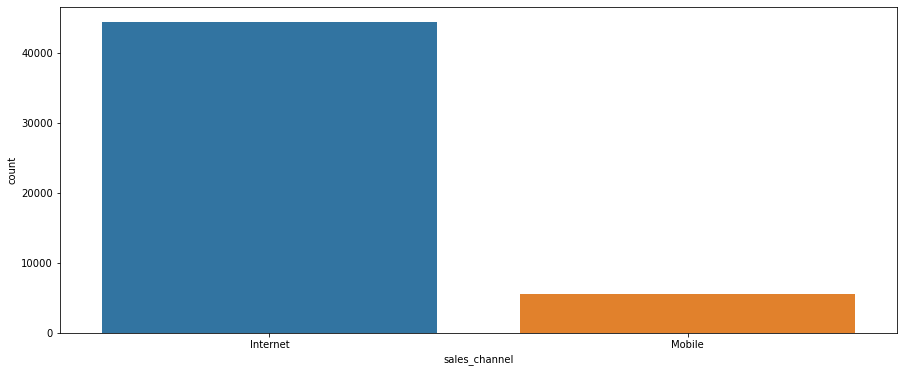

In [31]:
# Frequently used Booking channel
plt.figure(figsize=(15,6))
sns.countplot(x = "sales_channel", data=data, order=data["sales_channel"].value_counts().index)
plt.show()

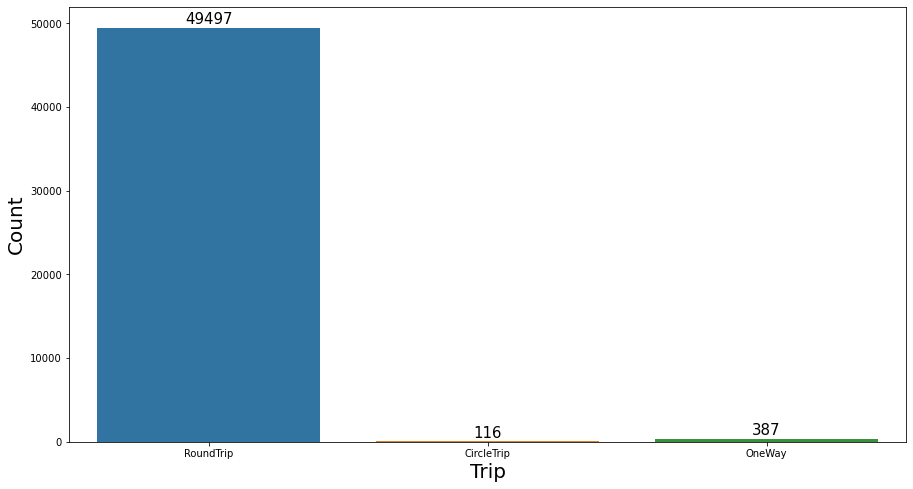

In [32]:
# Most frequently opted trip type
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type",  data=data)
plt.xlabel("Trip",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

Most passengers prefer to book round trip

In [33]:
data["booking_origin"].value_counts(ascending=False)

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

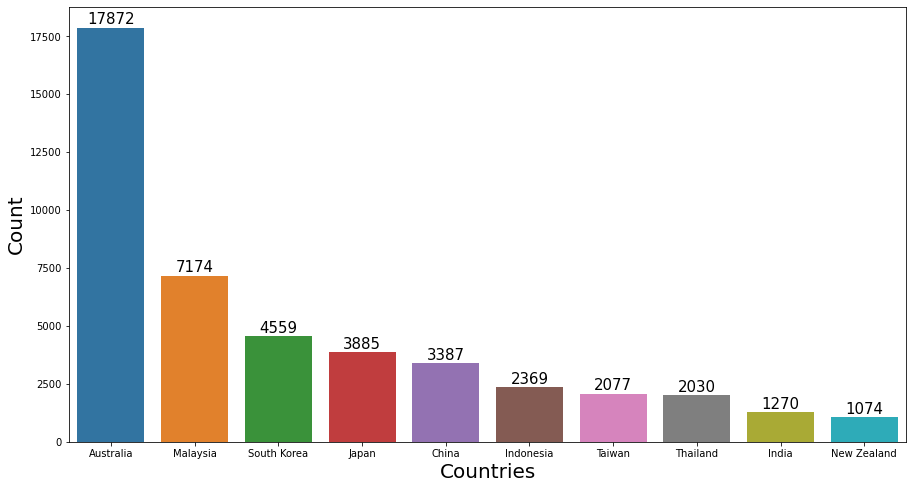

In [34]:
# Top 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=data ,order=data.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

Top 10 Countries with flight bookings

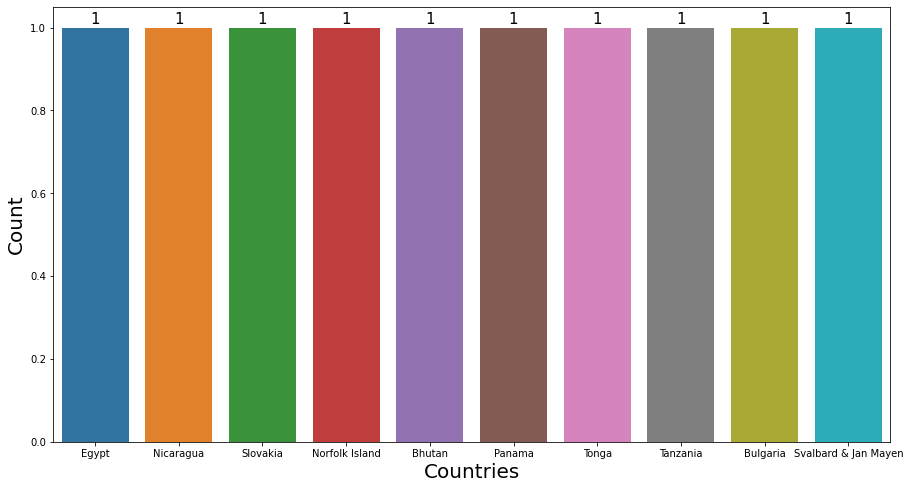

In [35]:
# Bottom 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=data ,order=data.booking_origin.value_counts().iloc[-10:].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

Bottom 10 Countries with flight bookings

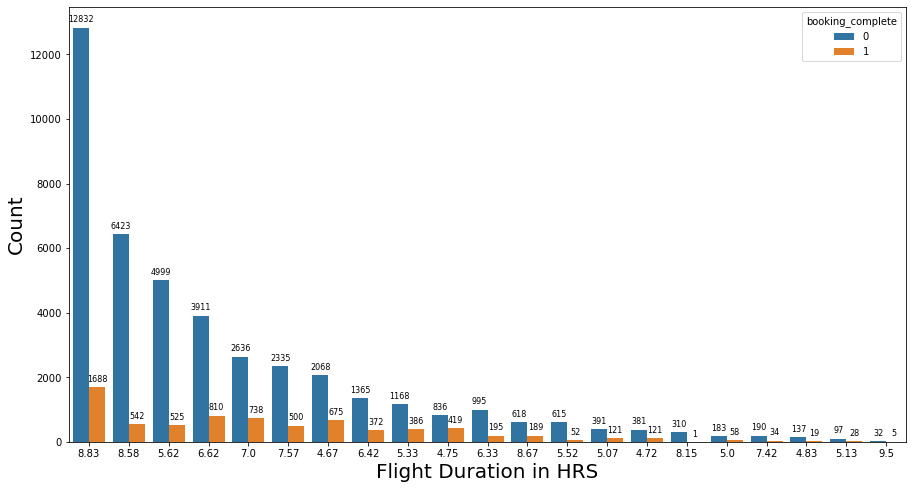

In [36]:
# Flight hour and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=data ,order=data.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

Majority of the Passengers are not opting for British airways flights which has flights duration >=8.

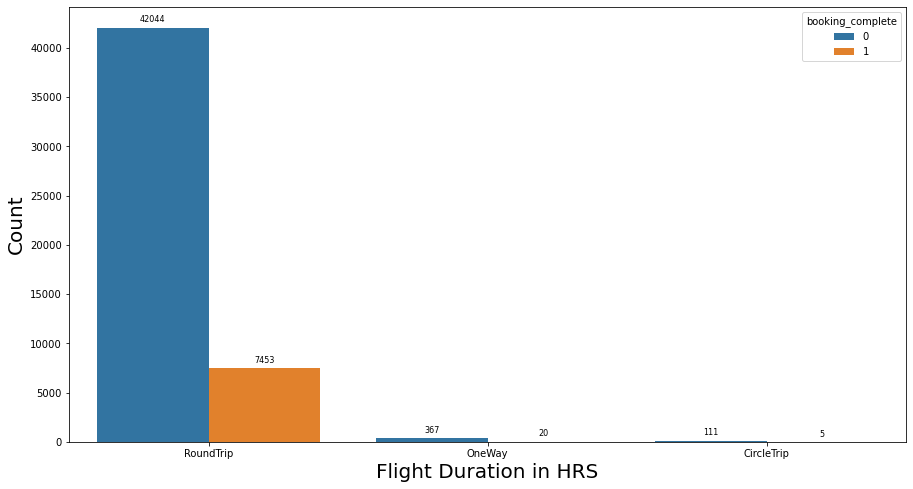

In [37]:
# trip type and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type", hue="booking_complete" , data=data ,order=data.trip_type.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

Most of the enquires are from passengers who are looking for round trip.

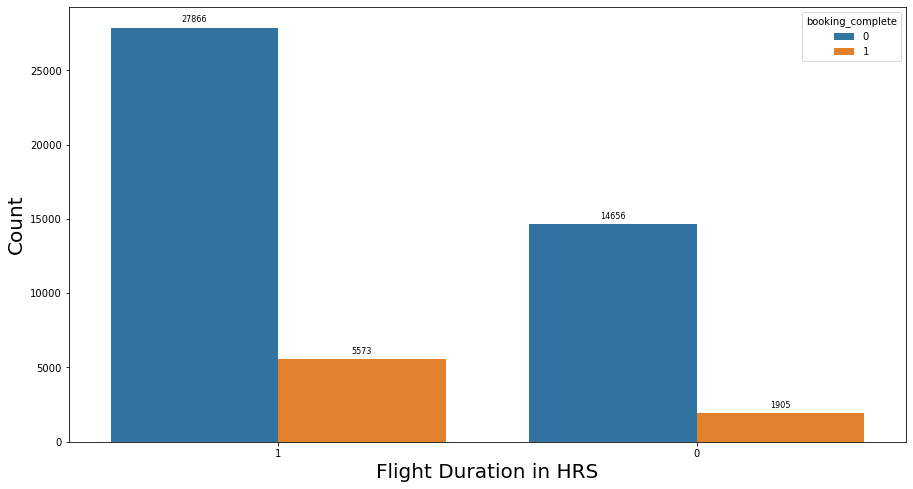

In [38]:
# trip type and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="wants_extra_baggage", hue="booking_complete" , data=data ,order=data.wants_extra_baggage.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

### 4.Splitting the dataset into train and test

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63783, 918)
(21261, 918)
(63783,)
(21261,)


### 5.Building model

In [40]:
#using random forest classifier
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

### 6.Predicting the test data

In [41]:
y_pred_rf_train = rforest.predict(x_train)
y_pred_rf_test = rforest.predict(x_test)

### 7.Performance metrics

In [42]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("####"*30)
print(confusion_matrix(y_test, y_pred_rf_test))

[[31886     6]
 [    2 31889]]
########################################################################################################################
[[10014   616]
 [ 1108  9523]]


In [43]:
print(classification_report(y_train, y_pred_rf_train))
print("####"*30)
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31892
           1       1.00      1.00      1.00     31891

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783

########################################################################################################################
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10630
           1       0.94      0.90      0.92     10631

    accuracy                           0.92     21261
   macro avg       0.92      0.92      0.92     21261
weighted avg       0.92      0.92      0.92     21261



### 8.Cross Validation

In [44]:
# Using K-FOLD method by using cross_val_score
accuracy = cross_val_score(rforest, x_train, y_train, cv=10)

In [45]:
accuracy

array([0.91691488, 0.91926634, 0.91863929, 0.91407965, 0.91784258,
       0.91580433, 0.92740671, 0.91643148, 0.91580433, 0.91564754])